# Loading libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import re
warnings.filterwarnings('ignore')

# Loading data

In [2]:
# === Load preselected SNP data === #
data_snp = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/ADSP/SNP_coding_chr1_chr22_onehot.csv")  # Replace with your full merged dataset if needed
print(data_snp.shape)
data_snp.head()


(48245, 5110)


,chr1_4585378_C_A_A_0,chr1_4585378_C_A_A_1,chr1_4585378_C_A_A_2,chr1_4585868_C_T_T_0,chr1_4585868_C_T_T_1,chr1_4585868_C_T_T_2,chr1_4588720_C_T_T_0,chr1_4588720_C_T_T_1,chr1_4588720_C_T_T_2,chr1_4588765_C_T_T_0,...,chr21_24637474_G_A_A_2.0,chr21_26382583_C_T_T_0.0,chr21_26382583_C_T_T_1.0,chr21_26382583_C_T_T_2.0,chr21_39878130_G_A_A_0.0,chr21_39878130_G_A_A_1.0,chr21_39878130_G_A_A_2.0,chr22_25314269_A_G_G_0.0,chr22_25314269_A_G_G_1.0,chr22_25314269_A_G_G_2.0
0,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
1,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
2,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
3,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
4,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False


In [3]:
# === Load preselected SNP data === #
data_pheno = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/ADSP/ADSPCaseControlPhenotypes_DS_2024.11.22_ALL_FiltByFAM.txt",sep="\t")  # Replace with your full merged dataset if needed
print(data_pheno.shape)
data_pheno.head()

(48245, 30)


,SUBJID,Cohort,Sex,PrevAD,IncAD,Age,Age_baseline,APOE_reported,APOE_WGS,AUTOPSY,...,Base_IncAD,Base_Age,Base_AUTOPSY,Base_Braak,Base_AD,Base_Version,Update_Baseline,Update_Latest,Update_ADstatus,Correction
0,A-ACT-AC000014,Adult_Changes_in_Thought_(ACT),0,0.0,0.0,77.0,73.0,23.0,23.0,NaN,...,0.0,77.0,NaN,0.0,0.0,phs000572.v3,0,0,0,0
1,A-ACT-AC000034,Adult_Changes_in_Thought_(ACT),0,0.0,0.0,68.0,66.0,33.0,33.0,NaN,...,0.0,68.0,NaN,1.0,0.0,phs000572.v3,0,0,0,0
2,A-ACT-AC000057,Adult_Changes_in_Thought_(ACT),0,0.0,1.0,88.0,81.0,33.0,33.0,NaN,...,1.0,88.0,NaN,4.0,1.0,phs000572.v3,0,0,0,0
3,A-ACT-AC000072,Adult_Changes_in_Thought_(ACT),1,0.0,1.0,90.0,89.0,33.0,33.0,NaN,...,1.0,89.0,NaN,6.0,1.0,phs000572.v3,1,0,0,1
4,A-ACT-AC000088,Adult_Changes_in_Thought_(ACT),1,0.0,1.0,86.0,73.0,33.0,33.0,NaN,...,1.0,86.0,NaN,5.0,1.0,phs000572.v3,0,0,0,0


In [4]:
data = pd.concat([data_pheno, data_snp], axis=1)
data

,SUBJID,Cohort,Sex,PrevAD,IncAD,Age,Age_baseline,APOE_reported,APOE_WGS,AUTOPSY,...,chr21_24637474_G_A_A_2.0,chr21_26382583_C_T_T_0.0,chr21_26382583_C_T_T_1.0,chr21_26382583_C_T_T_2.0,chr21_39878130_G_A_A_0.0,chr21_39878130_G_A_A_1.0,chr21_39878130_G_A_A_2.0,chr22_25314269_A_G_G_0.0,chr22_25314269_A_G_G_1.0,chr22_25314269_A_G_G_2.0
0,A-ACT-AC000014,Adult_Changes_in_Thought_(ACT),0,0.0,0.0,77.0,73.0,23.0,23.0,NaN,...,False,True,False,False,True,False,False,False,True,False
1,A-ACT-AC000034,Adult_Changes_in_Thought_(ACT),0,0.0,0.0,68.0,66.0,33.0,33.0,NaN,...,False,False,True,False,True,False,False,True,False,False
2,A-ACT-AC000057,Adult_Changes_in_Thought_(ACT),0,0.0,1.0,88.0,81.0,33.0,33.0,NaN,...,False,False,True,False,True,False,False,True,False,False
3,A-ACT-AC000072,Adult_Changes_in_Thought_(ACT),1,0.0,1.0,90.0,89.0,33.0,33.0,NaN,...,False,True,False,False,True,False,False,True,False,False
4,A-ACT-AC000088,Adult_Changes_in_Thought_(ACT),1,0.0,1.0,86.0,73.0,33.0,33.0,NaN,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48240,A-ADC-AD019351,NIA_Alzheimer_Disease_Centers_(ADC),1,0.0,0.0,77.0,64.0,44.0,44.0,NaN,...,False,False,True,False,True,False,False,True,False,False
48241,A-ADC-AD019352,NIA_Alzheimer_Disease_Centers_(ADC),0,NaN,NaN,NaN,78.0,34.0,34.0,NaN,...,False,False,True,False,False,True,False,True,False,False
48242,A-ADC-AD019353,NIA_Alzheimer_Disease_Centers_(ADC),1,0.0,0.0,82.0,82.0,34.0,34.0,NaN,...,False,True,False,False,True,False,False,True,False,False
48243,A-ADC-AD019354,NIA_Alzheimer_Disease_Centers_(ADC),0,NaN,NaN,NaN,70.0,33.0,33.0,NaN,...,False,True,False,False,True,False,False,True,False,False


In [5]:
data = data[data['Ethnicity'] == 0]
print(data.shape)

(32885, 5140)


In [6]:
# === Define features and target === #
data.rename(columns={'AD': 'ADRD'}, inplace=True)
data.rename(columns={'APOE_reported': 'APOE4'}, inplace=True)
df_filtered = data[data['ADRD'].notna()]
data = df_filtered.copy()
print(data.shape)


X = data.drop(columns=['SUBJID',
 'Cohort',
 'Sex',
 'PrevAD',
 'IncAD',
 'Age',
 'Age_baseline',
 'APOE4',
 'APOE_WGS',
 'AUTOPSY',
 'Braak',
 'Race',
 'Ethnicity',
 'Selection',
 'ADRD',
 'Comments',
 'Duplicate_SUBJID',
 'Flag',
 'Latest_Update_Version',
 'Base_PrevAD',
 'Base_IncAD',
 'Base_Age',
 'Base_AUTOPSY',
 'Base_Braak',
 'Base_AD',
 'Base_Version',
 'Update_Baseline',
 'Update_Latest',
 'Update_ADstatus',
 'Correction'])  # Replace 'ADRD_FINAL' with your phenotype column
y = data["ADRD"]

(26879, 5140)


In [7]:
X.head()

,chr1_4585378_C_A_A_0,chr1_4585378_C_A_A_1,chr1_4585378_C_A_A_2,chr1_4585868_C_T_T_0,chr1_4585868_C_T_T_1,chr1_4585868_C_T_T_2,chr1_4588720_C_T_T_0,chr1_4588720_C_T_T_1,chr1_4588720_C_T_T_2,chr1_4588765_C_T_T_0,...,chr21_24637474_G_A_A_2.0,chr21_26382583_C_T_T_0.0,chr21_26382583_C_T_T_1.0,chr21_26382583_C_T_T_2.0,chr21_39878130_G_A_A_0.0,chr21_39878130_G_A_A_1.0,chr21_39878130_G_A_A_2.0,chr22_25314269_A_G_G_0.0,chr22_25314269_A_G_G_1.0,chr22_25314269_A_G_G_2.0
0,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
1,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
2,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
3,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
4,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False


In [8]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: ADRD, dtype: float64

# Split data

In [9]:
# Check for NaNs or infinite values
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())


# Option 2 (alternative): Fill NaNs (optional)
# X = X.fillna(0)

# Check again
print("After cleaning - NaNs in X:", X.isnull().sum().sum())
print("After cleaning - NaNs in y:", y.isnull().sum())


NaNs in X: 0
NaNs in y: 0
Infinite values in X: 0
After cleaning - NaNs in X: 0
After cleaning - NaNs in y: 0


In [10]:
columns_no_nan = X.columns[X.notna().all()]
print(X.shape)
X_temp = X[columns_no_nan]
X = X_temp.copy()
print(X.shape)

(26879, 5110)
(26879, 5110)


In [11]:
#data_clean = data.dropna()
#data = data_clean.copy()
# Sanitize column names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

In [12]:
X

,chr1_4585378_C_A_A_0,chr1_4585378_C_A_A_1,chr1_4585378_C_A_A_2,chr1_4585868_C_T_T_0,chr1_4585868_C_T_T_1,chr1_4585868_C_T_T_2,chr1_4588720_C_T_T_0,chr1_4588720_C_T_T_1,chr1_4588720_C_T_T_2,chr1_4588765_C_T_T_0,...,chr21_24637474_G_A_A_2_0,chr21_26382583_C_T_T_0_0,chr21_26382583_C_T_T_1_0,chr21_26382583_C_T_T_2_0,chr21_39878130_G_A_A_0_0,chr21_39878130_G_A_A_1_0,chr21_39878130_G_A_A_2_0,chr22_25314269_A_G_G_0_0,chr22_25314269_A_G_G_1_0,chr22_25314269_A_G_G_2_0
0,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
1,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
2,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
3,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
4,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48233,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
48237,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
48239,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
48240,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False


In [13]:
y

0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
48233    0.0
48237    0.0
48239    0.0
48240    0.0
48242    0.0
Name: ADRD, Length: 26879, dtype: float64

In [14]:
# === Split data === #
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train


,chr1_4585378_C_A_A_0,chr1_4585378_C_A_A_1,chr1_4585378_C_A_A_2,chr1_4585868_C_T_T_0,chr1_4585868_C_T_T_1,chr1_4585868_C_T_T_2,chr1_4588720_C_T_T_0,chr1_4588720_C_T_T_1,chr1_4588720_C_T_T_2,chr1_4588765_C_T_T_0,...,chr21_24637474_G_A_A_2_0,chr21_26382583_C_T_T_0_0,chr21_26382583_C_T_T_1_0,chr21_26382583_C_T_T_2_0,chr21_39878130_G_A_A_0_0,chr21_39878130_G_A_A_1_0,chr21_39878130_G_A_A_2_0,chr22_25314269_A_G_G_0_0,chr22_25314269_A_G_G_1_0,chr22_25314269_A_G_G_2_0
43008,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
34436,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
25143,False,True,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
18446,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
24113,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29132,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
23468,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
16114,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
13684,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


# Logistic Regression Models

In [15]:
# === Logistic Regression Models === #
models = {
    "Logistic_Lasso": LogisticRegression(penalty='l1', solver='saga', max_iter=1000),
    "Logistic_Ridge": LogisticRegression(penalty='l2', solver='saga', max_iter=1000),
    "Logistic_ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
}

# Fitting


🔎 Performing cross-validation for Logistic_ElasticNet...
✅ Best hyperparameters for Logistic_ElasticNet: {'C': 0.01, 'penalty': 'elasticnet'}


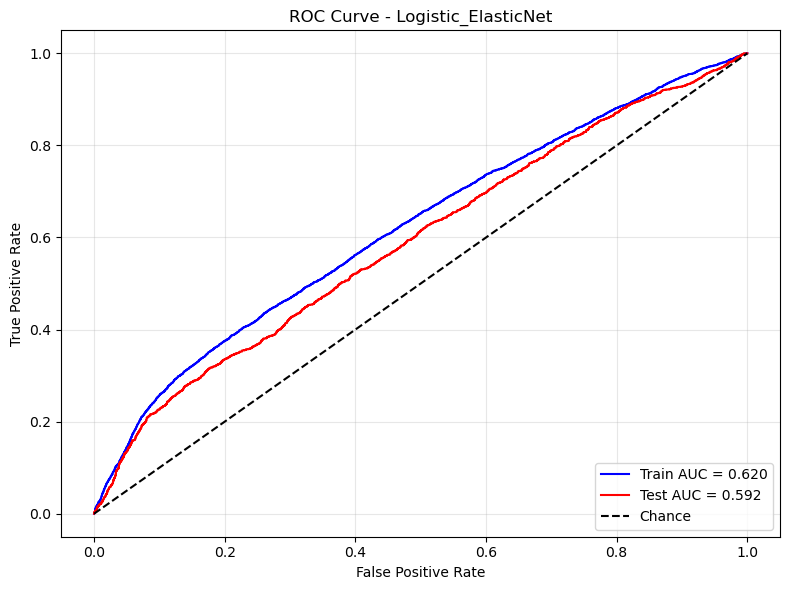

📊 Logistic_ElasticNet - Train AUC: 0.6203 | Test AUC: 0.5915

🔎 Performing cross-validation for XGBoost...
✅ Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'n_estimators': 200}


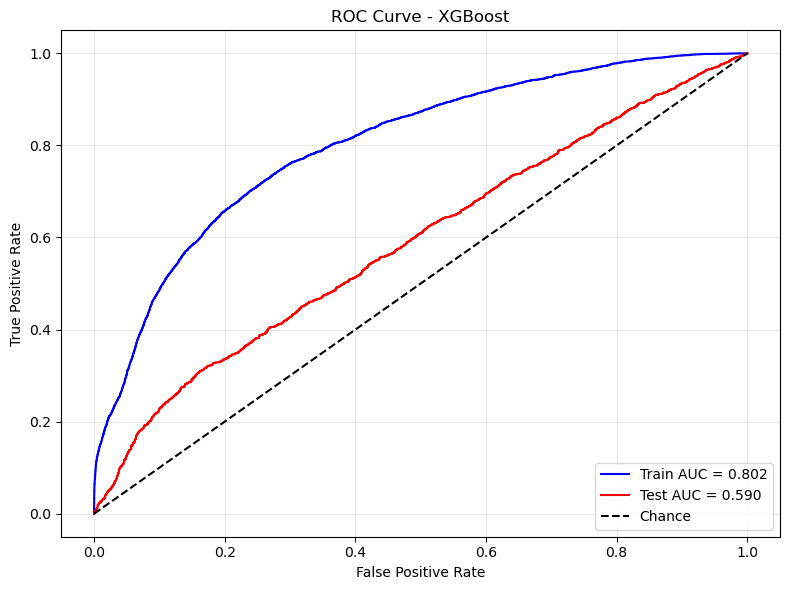

📊 XGBoost - Train AUC: 0.8018 | Test AUC: 0.5900

🔎 Performing cross-validation for LightGBM...
[LightGBM] [Info] Number of positive: 5887, number of negative: 14272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9724
[LightGBM] [Info] Number of data points in the train set: 20159, number of used features: 4862
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.292028 -> initscore=-0.885553
[LightGBM] [Info] Start training from score -0.885553
✅ Best hyperparameters for LightGBM: {'learning_rate': 0.01, 'n_estimators': 200}


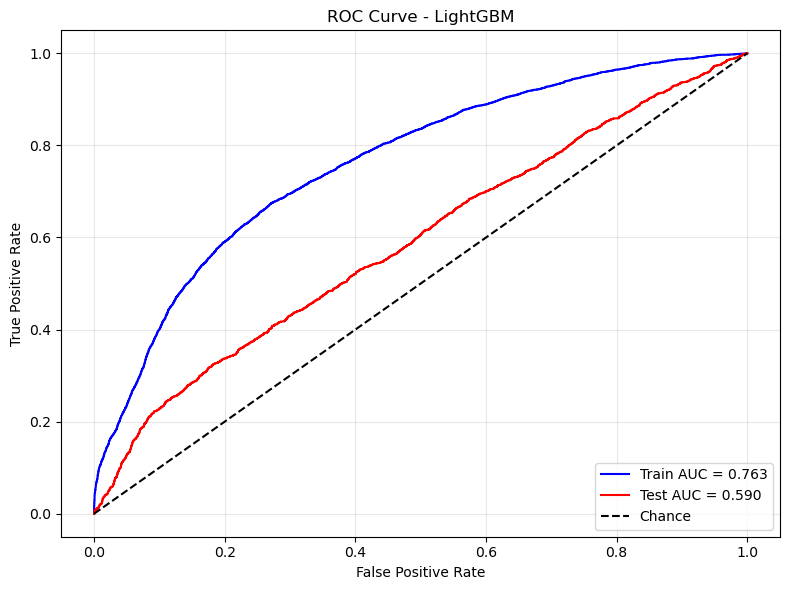

📊 LightGBM - Train AUC: 0.7629 | Test AUC: 0.5902

🔎 Performing cross-validation for CatBoost...


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

'''
# === Load and clean data === #
data = pd.read_csv("SNP_preselected_chr22.csv")
data_clean = data.dropna()
X = data_clean.drop(columns=["IID", "ADRD"])
y = data_clean["ADRD"]

# Sanitize feature names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

'''

# === Define models and hyperparameter grids === #
param_grids = {
    "Logistic_ElasticNet": {
        "model": LogisticRegression(solver='saga', max_iter=1000, l1_ratio=0.5),
        "params": {"penalty": ["elasticnet"], "C": [0.01, 0.1, 1, 10]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "LightGBM": {
        "model": LGBMClassifier(),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "params": {"depth": [4, 6, 8], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "NeuralNetwork": {
        "model": MLPClassifier(max_iter=500),
        "params": {"hidden_layer_sizes": [(50,), (100,), (100, 50)]}
    },
    "Logistic_Lasso": {
        "model": LogisticRegression(solver='saga', max_iter=1000),
        "params": {"penalty": ["l1"], "C": [0.01, 0.1, 1, 10]}
    },
    "Logistic_Ridge": {
        "model": LogisticRegression(solver='saga', max_iter=1000),
        "params": {"penalty": ["l2"], "C": [0.01, 0.1, 1, 10]}
    }
}

# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# === Train, evaluate, and plot ROC curves === #
for name, config in param_grids.items():
    print(f"\n🔎 Performing cross-validation for {name}...")
    
    grid_search = GridSearchCV(
        config["model"], config["params"], cv=cv, scoring='roc_auc', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)  # Cross-validation on training set
    best_model = grid_search.best_estimator_  # Select best model from CV
    
    print(f"✅ Best hyperparameters for {name}: {grid_search.best_params_}")

    # Predict probabilities using the best model
    y_train_pred = best_model.predict_proba(X_train)[:, 1]
    y_test_pred = best_model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", color='blue')
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", color='red')
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"../output/plots/ROC_{name}_WithCV_ONEHOT.png")
    plt.show()

    print(f"📊 {name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")


# Evaluation of feature importance

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X

,chr1_63043840_AG_A_A_0,chr1_63043840_AG_A_A_1,chr1_63043840_AG_A_A_2,chr2_109640281_G_A_A_0,chr2_109640281_G_A_A_1,chr2_109640281_G_A_A_2,chr2_111695715_C_T_T_0,chr2_111695715_C_T_T_1,chr2_111695715_C_T_T_2,chr2_111703717_G_A_A_0,...,chr20_8823625_G_A_A_1,chr20_8823625_G_A_A_2,chr20_17888796_G_T_T_0,chr20_17888796_G_T_T_1,chr20_24136062_T_G_T_0,chr20_24136062_T_G_T_1,chr20_24136062_T_G_T_2,chr22_48531736_T_C_T_0,chr22_48531736_T_C_T_1,chr22_48531736_T_C_T_2
0,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,True,False
1,True,False,False,True,False,False,True,False,False,True,...,True,False,True,False,True,False,False,False,True,False
2,False,True,False,False,True,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
4,False,True,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
5,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
507,False,True,False,True,False,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
508,False,True,False,False,True,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
509,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,True,False,True,False,False



Evaluating Logistic_Lasso...


Mean ROC-AUC: 0.5194 ± 0.0204


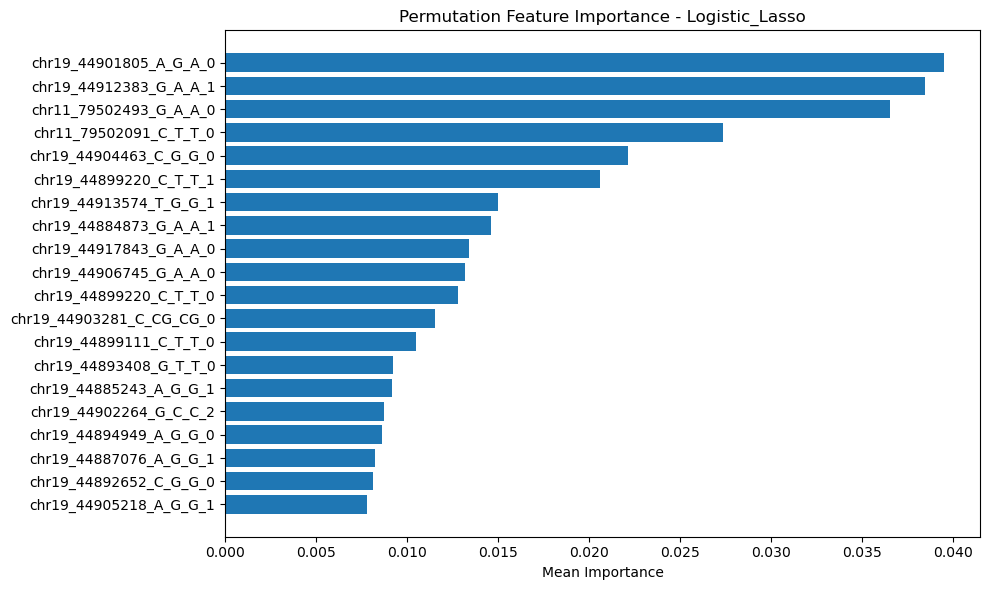


Evaluating Logistic_Ridge...
Mean ROC-AUC: 0.5213 ± 0.0175


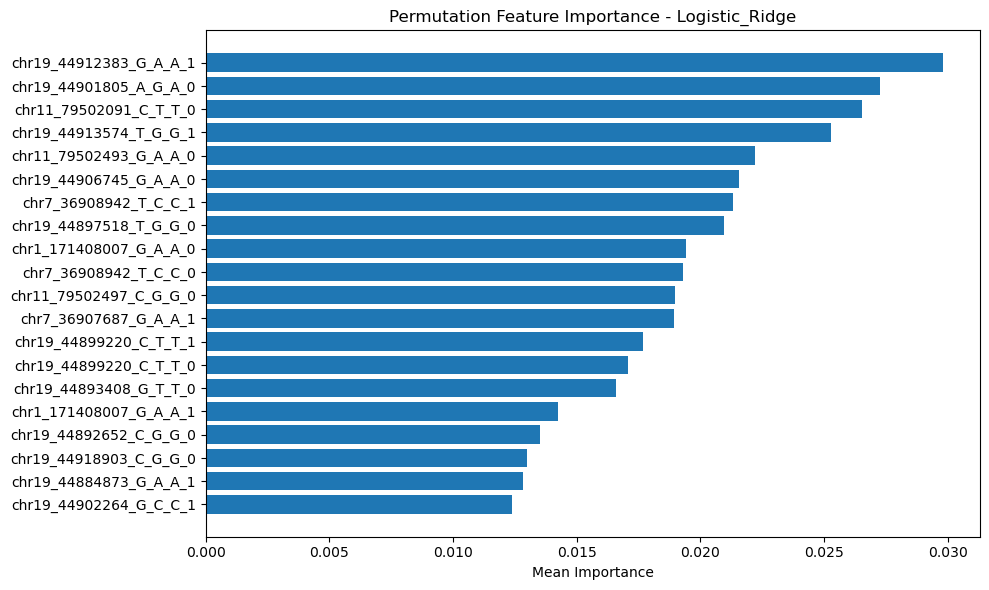


Evaluating Logistic_ElasticNet...
Mean ROC-AUC: 0.5210 ± 0.0191


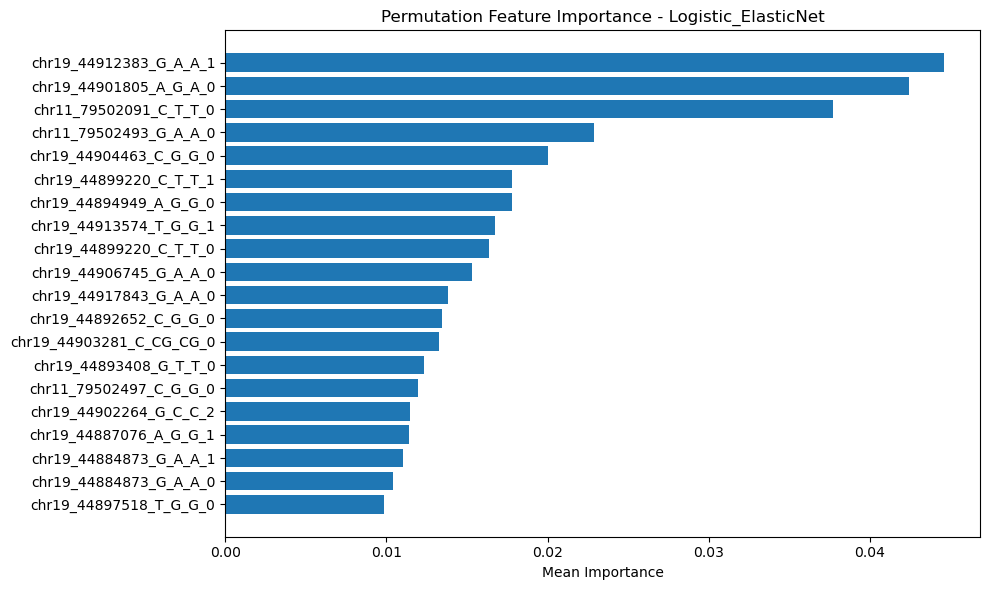


Evaluating XGBoost...
Mean ROC-AUC: 0.5212 ± 0.0319


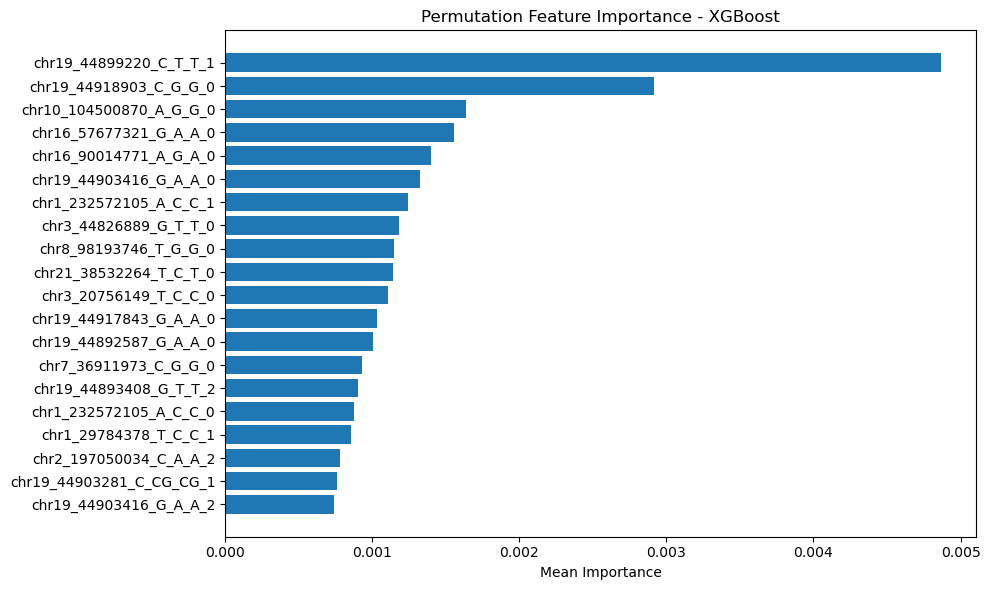


Evaluating LightGBM...
Mean ROC-AUC: 0.5266 ± 0.0319
[LightGBM] [Info] Number of positive: 860, number of negative: 1749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 2609, number of used features: 380
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329628 -> initscore=-0.709867
[LightGBM] [Info] Start training from score -0.709867


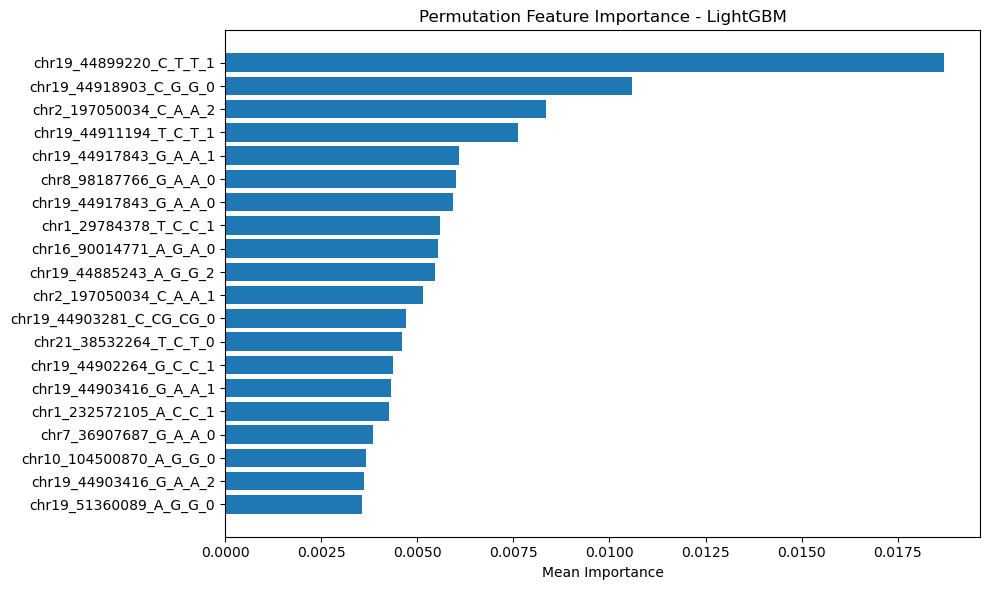


Evaluating CatBoost...
Mean ROC-AUC: 0.5277 ± 0.0272


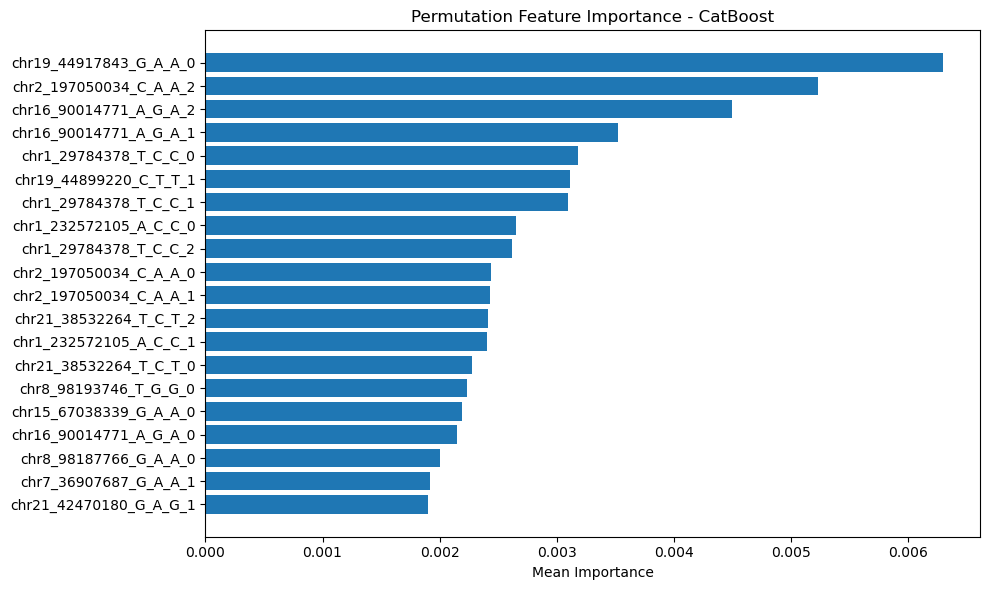


Evaluating NeuralNetwork...
Mean ROC-AUC: 0.5167 ± 0.0351


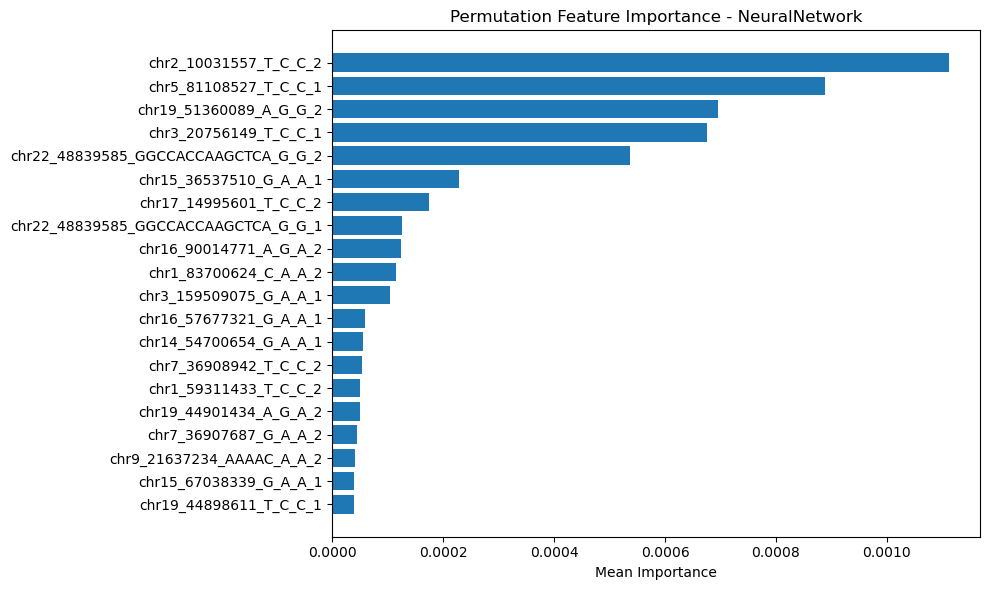

In [ ]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# === Evaluate models === #
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Cross-validated ROC-AUC
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    print(f"Mean ROC-AUC: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")
    
    # Fit the model on the full dataset to get feature importance
    model.fit(X, y)
    
    # Permutation Feature Importance (PFI)
    result = permutation_importance(model, X, y, scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    # Save feature importance
    importance_df.to_csv(f"PFI_{name}.csv", index=False)
    
    # Plot top 20 features
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
    plt.xlabel('Mean Importance')
    plt.title(f'Permutation Feature Importance - {name}')
    plt.tight_layout()
    plt.savefig(f"PFI_{name}_ONEHOT.png")
    plt.show()